
# 📊  Polynomial Regression  📊


📍 **The Regression Formula:**  
### $\hat{y} = b_0 + b_1X + b_2X^2 + ... + b_nX^n + \epsilon$  

# **Where:**  
✔️ **$\hat{y}$ (Predicted Value)** → The estimated outcome (e.g., salary 💰)  
✔️ **$X, X^2, ..., X^n$ (Polynomial Features)** → Transformed input features capturing non-linearity 📊  
✔️ **$b_0$ (Intercept) 🏁** → The starting value when **$X = 0$** (base prediction)  
✔️ **$b_1, b_2, ..., b_n$ (Coefficients) 📈** → The rate at which **$\hat{y}$** changes for each polynomial term of **$X$**  
✔️ **⚠️ $\epsilon$ (Error Term)** → Represents the difference between actual and predicted values due to noise 🔄  

---

**💡 Key Insight:**  
- The **intercept ($b_0$)** represents the base outcome when the input variable is zero.  
- Each **coefficient ($b_1, b_2, ..., b_n$)** determines how much the predicted value changes with each increasing power of $X$.  
- If **$b_1, b_2, ..., b_n$** are positive, the polynomial curve trends **upward** 📈 (increase in input leads to an increase in prediction).  
- If **$b_1, b_2, ..., b_n$** are negative, the polynomial curve trends **downward** 📉 (increase in input leads to a decrease in prediction).  
- Unlike **Multiple Linear Regression**, Polynomial Regression captures **non-linear relationships** by introducing **higher-degree terms** of $X$.  

🚀 **Polynomial Regression is powerful when relationships between variables are curved, rather than strictly linear!**  

---

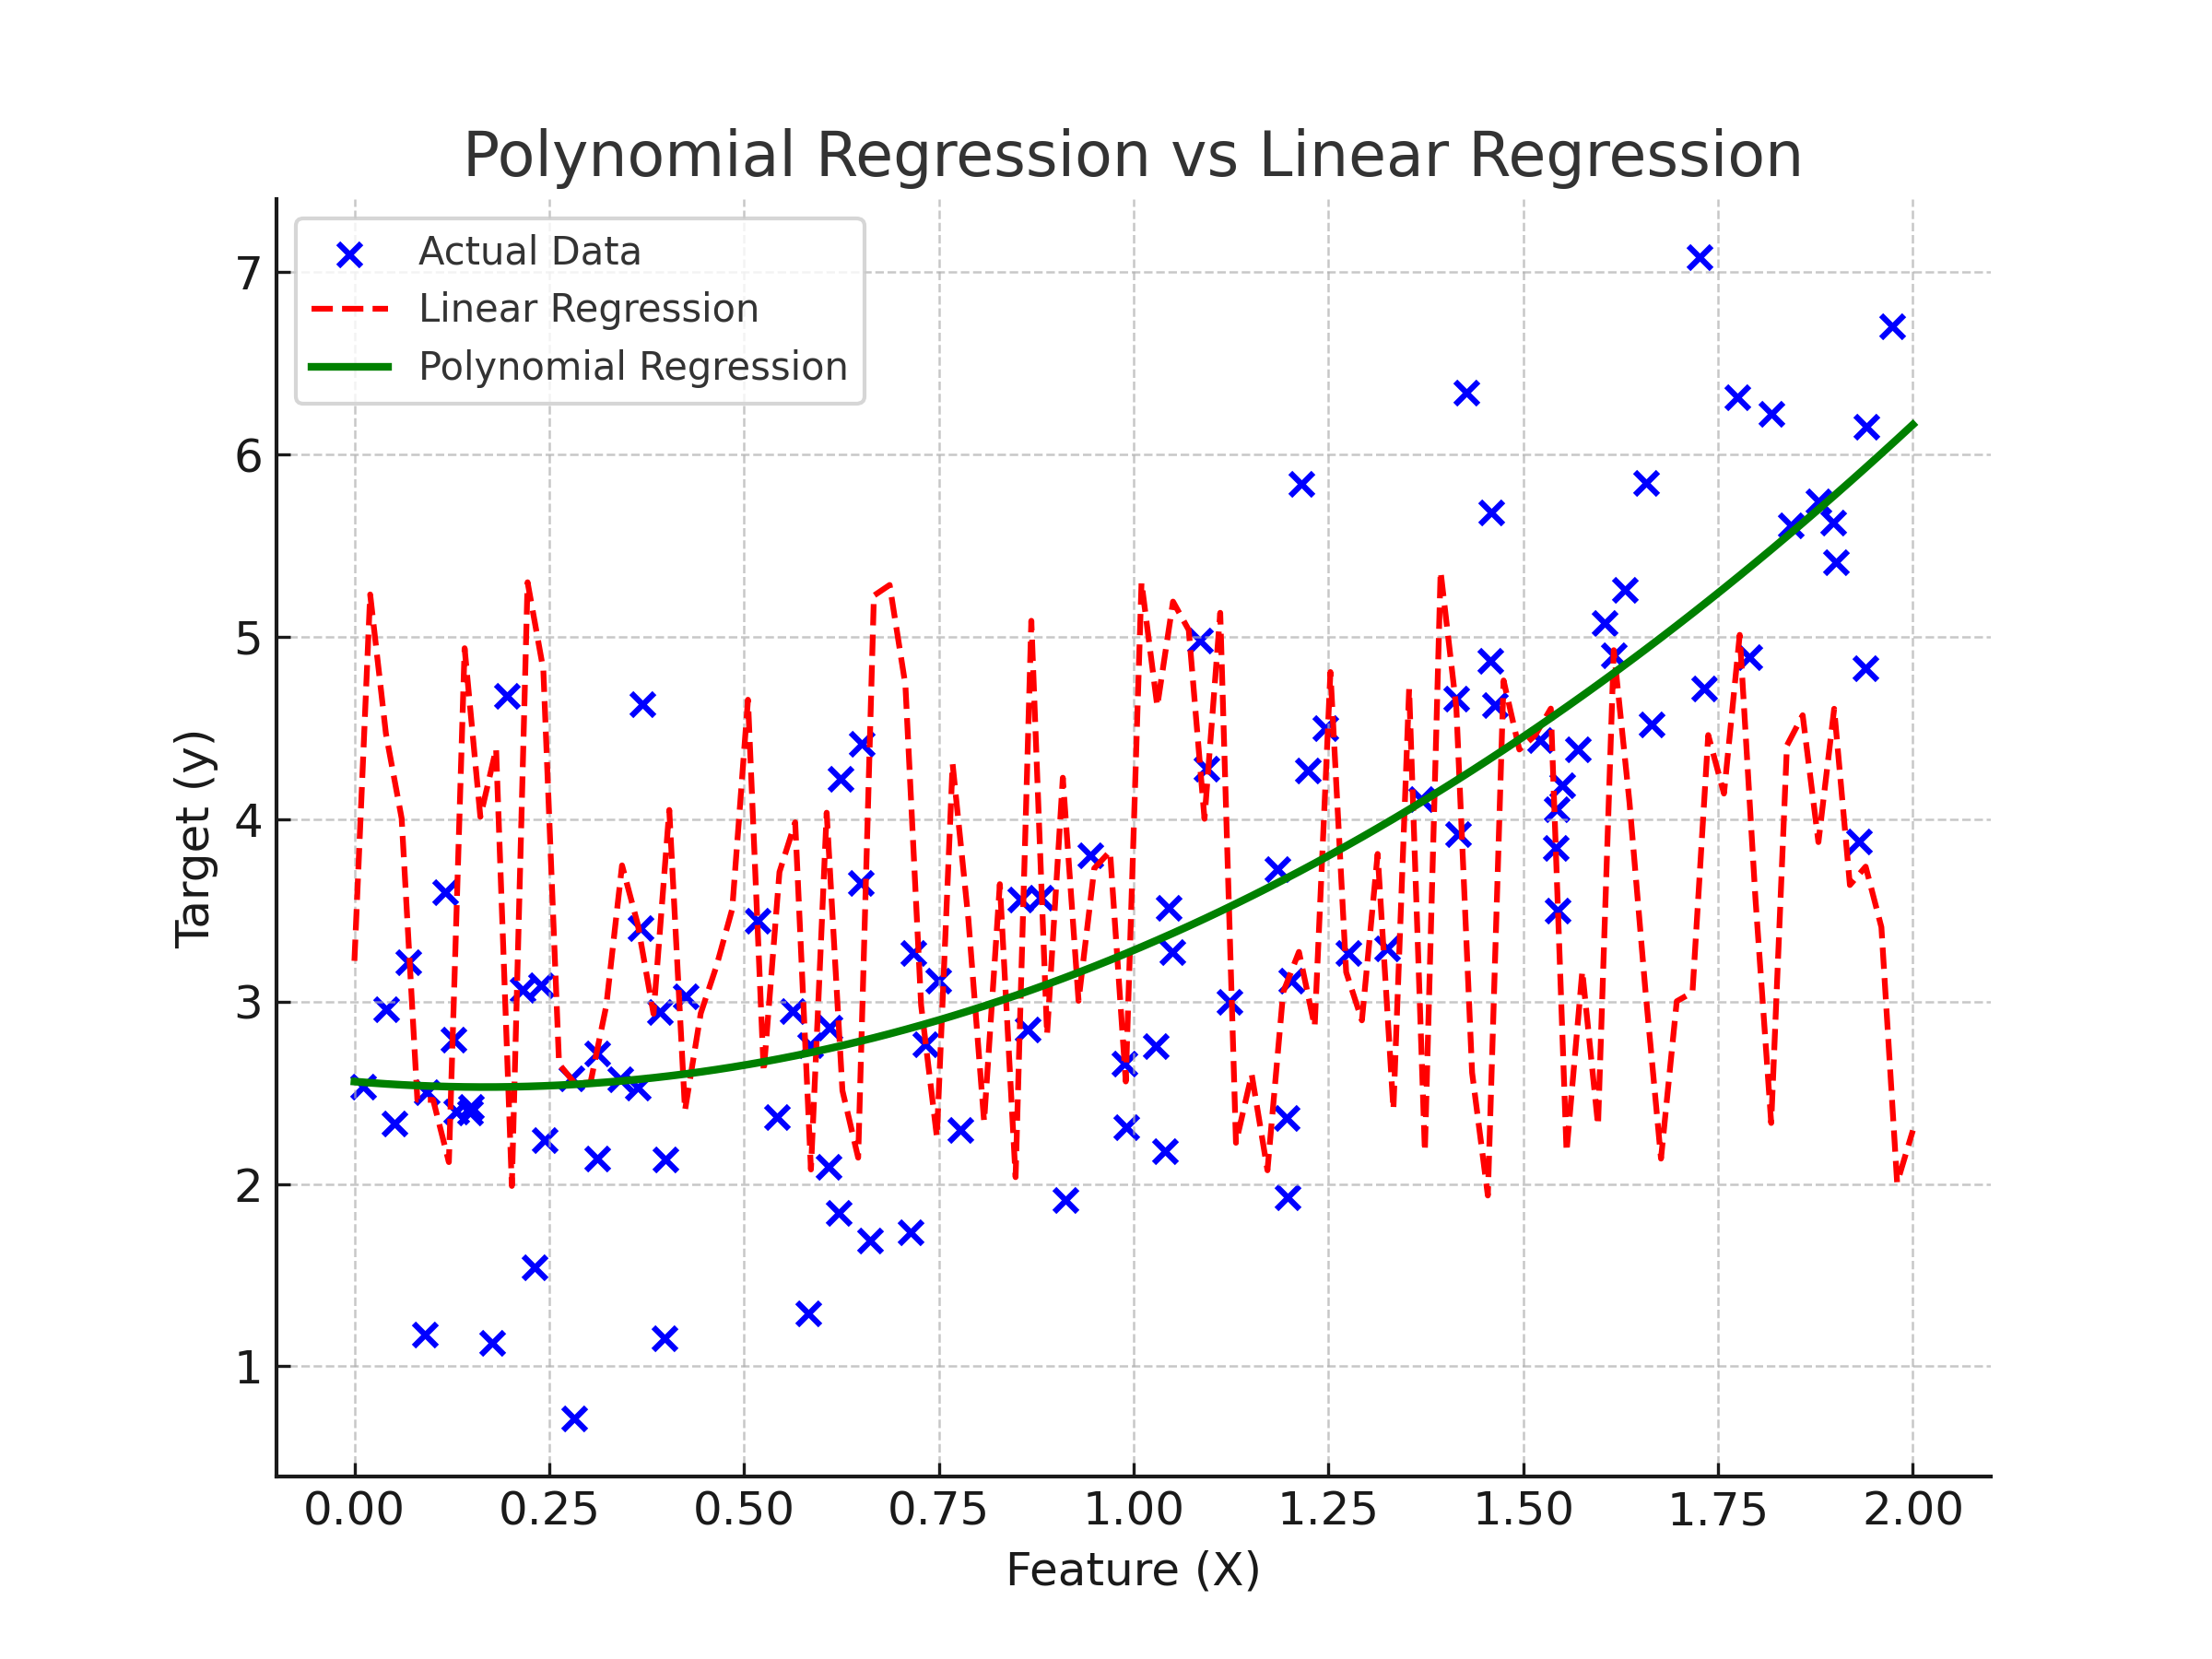

#🚀 Importing the Required Libraries
We import necessary libraries to handle data, visualization, and model training.

In [ ]:
# 📦 Import necessary libraries
import numpy as np  # 🔢 Numerical computations
import matplotlib.pyplot as plt  # 📊 Data visualization
import pandas as pd  # 📑 Handling datasets

#🚀 Importing the dataset

In [ ]:
# 📂 Importing the dataset
dataset = pd.read_csv("Position_Salaries.csv")  # Reading data from the CSV file

# 🏗 Extracting independent variable (X) and dependent variable (y)
X = dataset.iloc[:, 1:2].values  # 📊 Selecting the feature column as a matrix
y = dataset.iloc[:, -1].values  # 🎯 Selecting the target variable


#🚀 Training the Linear Regression model on the whole dataset

In [ ]:
# 🏆 Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression  # 📏 Importing the Linear Regression class

lin_reg = LinearRegression()  # ⚙ Creating a Linear Regression model
lin_reg.fit(X, y)  # 🔄 Training the model using the dataset

# ✅ The Linear Regression model is now trained and can be used for predictions.


LinearRegression()

#🚀 Training the Polynomial Regression model on the whole dataset

In [ ]:
# 🔄 Applying Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)  # 🔢 Transforming X to include polynomial terms (degree=4)
X_poly = poly_reg.fit_transform(X)  # 🏗 Generating polynomial features

lin_reg_2 = LinearRegression()  # ⚙ Creating another regression model
lin_reg_2.fit(X_poly, y)  # 🎯 Training on the polynomial features

# 🎛 The degree of polynomial can be adjusted to better capture non-linear relationships.


LinearRegression()

#🚀 Visualising the Linear Regression results

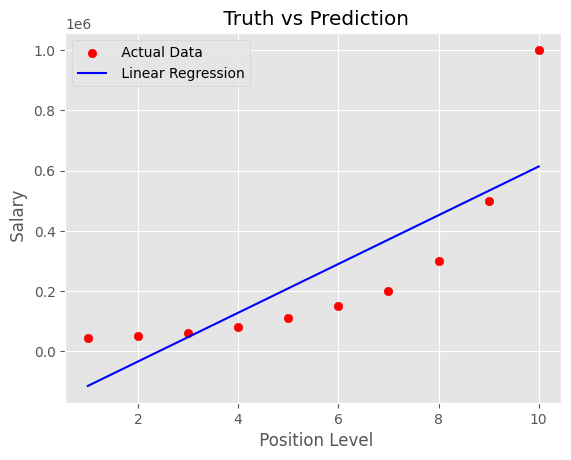

In [ ]:
# 📊 Visualizing the Results of Linear and Polynomial Regression

plt.scatter(X, y, color='red', label=" Actual Data")  # Scatter plot of real observations
plt.plot(X, lin_reg.predict(X), color='blue', label=" Linear Regression")  # Linear model predictions

plt.title(" Truth vs Prediction")
plt.xlabel(" Position Level")
plt.ylabel(" Salary")
plt.legend()
plt.show()



#🚀 degree of the polynomial regression model

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Function to update polynomial regression visualization dynamically
def update_poly(degree):
    """
    Updates the polynomial regression plot dynamically based on the selected degree.

    Parameters:
    degree (int): The degree of the polynomial regression model.
    """
    # Create polynomial features with the selected degree
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X)  # Transform X into polynomial features

    # Train a new Linear Regression model on the transformed polynomial data
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)

    # Plot actual data points
    plt.scatter(X, y, color='red', label="Actual Data")

    # Plot polynomial regression prediction curve
    plt.plot(X, lin_reg_2.predict(X_poly), color='green',
             label=f"Polynomial Regression (Degree={degree})")

    # Set plot title and axis labels
    plt.title(f"Polynomial Regression with Degree={degree}")
    plt.xlabel("Position Level")
    plt.ylabel("Salary")

    # Show legend
    plt.legend()

    # Display the plot
    plt.show()

# Create an interactive slider to adjust polynomial degree
slider = widgets.IntSlider(min=1, max=10, step=1, value=4, description='Degree')

# Link the slider to the update_poly function
widgets.interactive(update_poly, degree=slider)

interactive(children=(IntSlider(value=4, description='Degree', max=10, min=1), Output()), _dom_classes=('widge…

#🚀 Visualising the Polynomial and linear Regression results

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


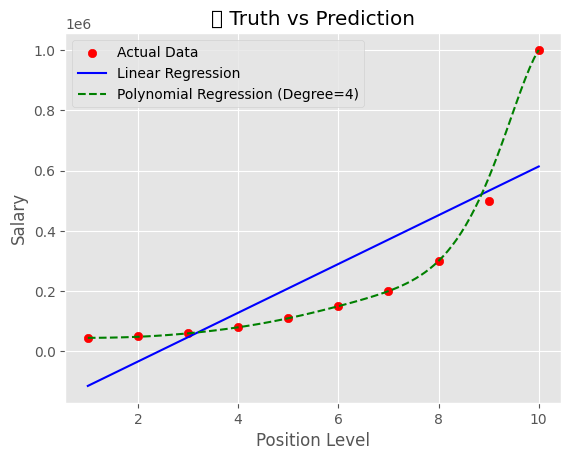

In [ ]:
import numpy as np

# Generate more points for a smoother polynomial curve
X_grid = np.linspace(min(X), max(X), 100).reshape(-1, 1)

# Plot actual data points
plt.scatter(X, y, color='red', label="Actual Data")

# Plot linear regression prediction
plt.plot(X, lin_reg.predict(X), color='blue', label="Linear Regression")

# Plot polynomial regression on a smooth curve
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)),
         color='green', linestyle='dashed', label="Polynomial Regression (Degree=4)")

plt.title("📊 Truth vs Prediction")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()

# 🚀 Predicting a new result with Polynomial Regression and Linear Regression

In [ ]:
# 🎯 Making Predictions

# 🔵 Predicting a new result with **Linear Regression**
linear_prediction = lin_reg.predict([[6.5]])

# 🟢 Predicting a new result with **Polynomial Regression**
polynomial_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

print(f"📏 Linear Regression Prediction: {linear_prediction[0]:.2f}")
print(f"🎢 Polynomial Regression Prediction: {polynomial_prediction[0]:.2f}")

# 🚀 The polynomial regression result should be closer to the actual value.


📏 Linear Regression Prediction: 330378.79
🎢 Polynomial Regression Prediction: 174878.08


# 🏆 Model Evaluation: Which Regression is Best?

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# Compute additional error metrics
mae_lin = mean_absolute_error(y, y_pred_lin)  # Mean Absolute Error (MAE)
mae_poly = mean_absolute_error(y, y_pred_poly)

rmse_lin = np.sqrt(mse_lin)  # Root Mean Squared Error (RMSE)
rmse_poly = np.sqrt(mse_poly)

# Create an enhanced dataframe with the correct calculations
performance_comparison_final = pd.DataFrame({
    "📊 Model": ["🔵 Linear Regression", "🟢 Polynomial Regression (Degree=4)"],
    "🎯 R² Score": [r2_lin, r2_poly],
    "📉 Mean Absolute Error (MAE)": [mae_lin, mae_poly],
    "📏 Mean Squared Error (MSE)": [mse_lin, mse_poly],
    "🔄 Root Mean Squared Error (RMSE)": [rmse_lin, rmse_poly]
})

# Display the final enhanced performance comparison (Jupyter-friendly)
display(performance_comparison_final)

,📊 Model,🎯 R² Score,📉 Mean Absolute Error (MAE),📏 Mean Squared Error (MSE),🔄 Root Mean Squared Error (RMSE)
0,🔵 Linear Regression,0.669041,128454.545455,2.669588e+10,163388.735193
1,🟢 Polynomial Regression (Degree=4),0.999797,3360.839161,1.638228e+07,4047.503475


# 📉 Summary

In [ ]:
print("✅ **Final Conclusion:** Polynomial Regression (Degree=4) significantly outperforms Linear Regression.")
print("🔹 **R² Score:** Polynomial = High accuracy (0.9997) vs. Linear = Poor fit (0.6690).")
print("📉 **Mean Absolute Error (MAE):** Polynomial is ~40x smaller, meaning more precise predictions.")
print("🔄 **RMSE:** Polynomial = 4047.5 vs. Linear = 163388, showing a much better fit.")
print("\n🚀 **Polynomial Regression is the clear winner for this dataset!**")

✅ **Final Conclusion:** Polynomial Regression (Degree=4) significantly outperforms Linear Regression.
🔹 **R² Score:** Polynomial = High accuracy (0.9997) vs. Linear = Poor fit (0.6690).
📉 **Mean Absolute Error (MAE):** Polynomial is ~40x smaller, meaning more precise predictions.
🔄 **RMSE:** Polynomial = 4047.5 vs. Linear = 163388, showing a much better fit.

🚀 **Polynomial Regression is the clear winner for this dataset!**
